<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



# 1) Write a function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000.

What is the probability that a person is drunk after one positive breathalyzer test?
What is the probability that a person is drunk after two positive breathalyzer tests?
How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [0]:
def as_percentage(number):
  percentage = str(round(((number)*100), 2)) + "%"
  return percentage



def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, tests=1):
  
  tpr = 1                            # True positive rate
  p_not_drunk = 1 - prob_drunk_prior # Probability not drunk
  exp = 1                            # Exponent
  test_list = []                     # Initialize test list
  disp_phrase = "Test no. "
  
  for test in range(1, tests+1):

    numerator =  (tpr**exp) * prob_drunk_prior
    denominator = ((tpr**exp) * prob_drunk_prior)+((false_positive_rate**exp) * 
                                               p_not_drunk)
    result = numerator / denominator

    t = str(test) # Test number as string

    t_result = disp_phrase + t + ": " + as_percentage(result)

    exp += 1

    test_list.append(t_result)
 

  return test_list


In [94]:
prob_drunk_given_positive(.001, .08, tests=4)

['Test no. 1: 1.24%',
 'Test no. 2: 13.53%',
 'Test no. 3: 66.16%',
 'Test no. 4: 96.07%']

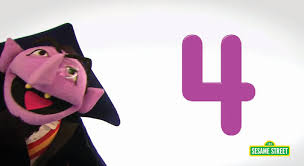

# 2) Explore scipy.stats.bayes_mvs
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
Matplotlib Error Bars
Seaborn barplot with error bars
Vertical ines to show bounds of confidence interval
Confidence Intervals on Box Plots

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

df = df.replace({'?': np.NaN, 'y':1, 'n':0})

rep = df[df.party == 'republican']

dem = df[df.party == 'democrat']

--2019-10-10 04:31:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-10-10 04:31:29 (127 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
def confidence_interval(data, confidence=0.90):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  margin = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean, mean - margin, mean + margin)

In [129]:
confidence_interval(dem['water-project'].dropna())

(0.502092050209205, 0.4485741887250509, 0.5556099116933592)

(Mean(statistic=0.502092050209205, minmax=(0.44857418872505084, 0.5556099116933592)),
 Variance(statistic=0.25317353379192964, minmax=(0.21727917340719874, 0.293915743182754)),
 Std_dev(statistic=0.5026307974956246, minmax=(0.4661321415727505, 0.542139966413429)))

In [153]:
mean, variance, std_dev = bayes_mvs(dem['water-project'].dropna())

bayesian_interval = (mean.minmax[0], mean.statistic, mean.minmax[1])

bayesian_interval

(0.44857418872505084, 0.502092050209205, 0.5556099116933592)

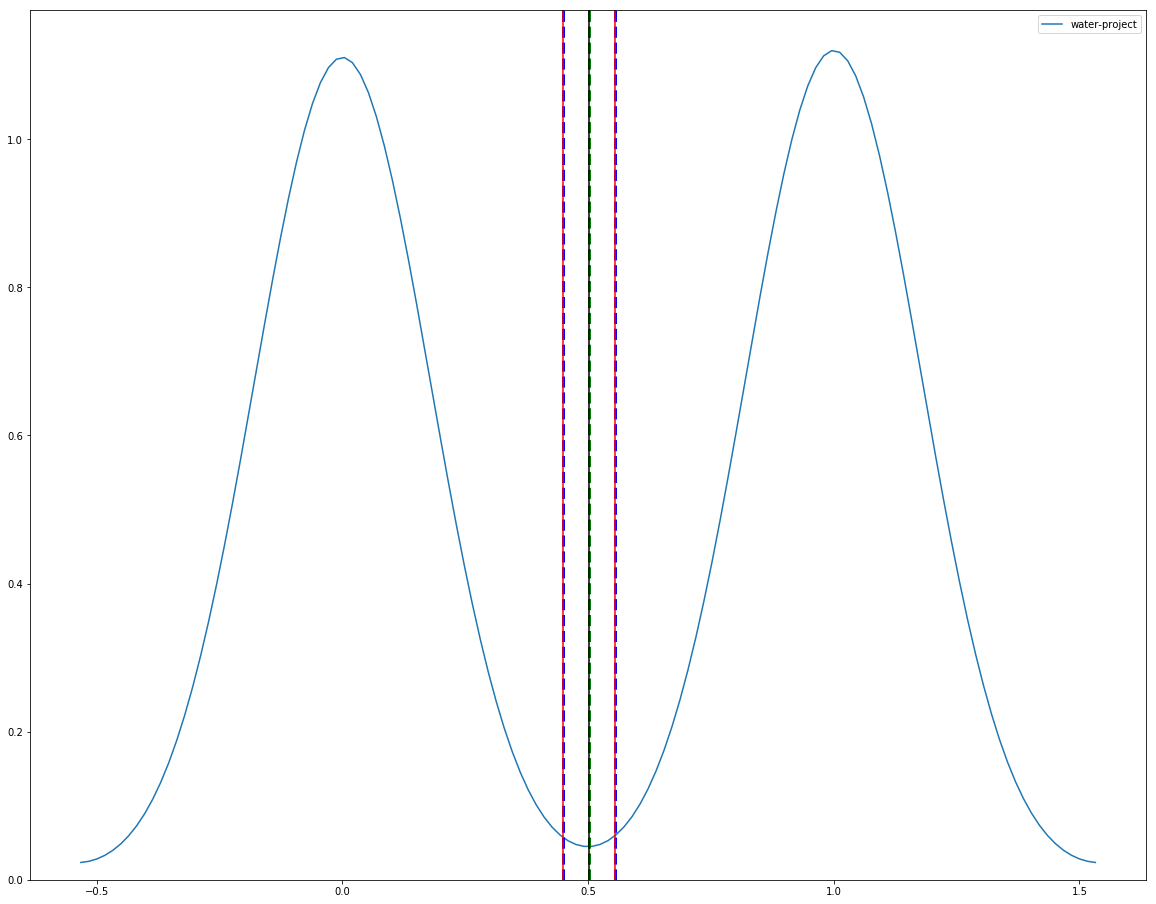

In [177]:
import seaborn as sns

water_project = dem['water-project'].dropna()
plt.figure(figsize=(20,16))
sns.kdeplot(water_project)
CI = confidence_interval(water_project)
BI = bayesian_interval
plt.axvline(x=BI[1], color='green', linewidth='3', linestyle='--')
plt.axvline(x=BI[0], color='blue', linewidth='3', linestyle='--')
plt.axvline(x=BI[2], color='blue', linewidth='3', linestyle='--')
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

# In your own words, summarize the difference between Bayesian and Frequentist statistic

The main feature, ***that I in my abundance of ignorance***, of Bayesian Statistic is the application of the priors, more specifically when one dives into more abstract areas - subjective priors. I think someone with a more traditionalist view would argue that these subjective priors undermine scientific methods, but you could also argue that one could manipulate these priors and draw from their effects on the data and therefore gain insight into how our own biases impact the testing. I think this is something that often is neglected or outright rejected in modern scientific communities, a preconcieved notion that they are aware of their biases and sufficiently trained to ensure that they are encounted for in testing. This is in some ways more harmful, than the bayesian approach as one more actively sees the effects of the bias and cannot then ignore or reject them.

Another important point of contention is that a frequentist would argue that certain probabilities are not contingent on the priors, that certain things are black and white - true or false. This is a bigger philosophical debate, but my personal belief is that life is not so black and white and rather more gradient. Perhaps our understanding in certain aspects is as of yet insufficient to perceive these gradients in areas which we purport to be black and white. 

Bayesian statistic incorporates human reasoning into the domain of statistic, which is perhaps why it gains popularity in certain fields because in a way it provides a somewhat decent analog for the innate statistical reasoning that humans and other creatures perform subconciously throughout their daily lives.

However, an important tool in the frequentist model is it's objectivety. I think the differences between the two are important and it is hard to argue which one is better without knowing the specific application - as both approaches have features which would make them more powerful than their counterpart situationally.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
def prob_consecutive_tests